In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 5 - Transformación de variables numéricas/'

In [2]:
data=pd.read_csv(ruta+'num.csv')
data.head()

,0,1,2
0,0.255228,0.902346,0.733752
1,0.226339,0.925600,0.385178
2,0.205234,0.921390,0.547819
3,0.231553,0.885718,0.880428
4,0.185737,0.889161,0.953430


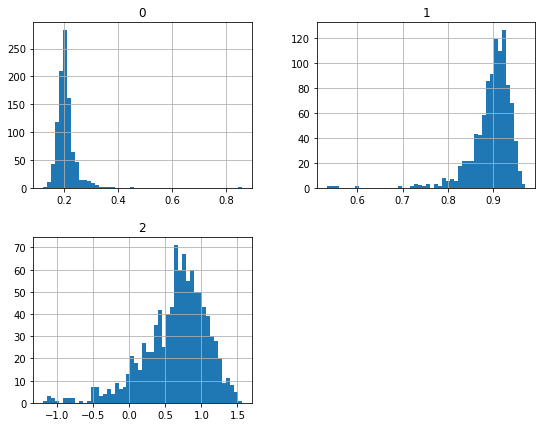

In [3]:
H=data.hist(figsize=(9,7),bins=50)

# Función logaritmo
$$
x'=\log(x),
$$
para $x>0$.

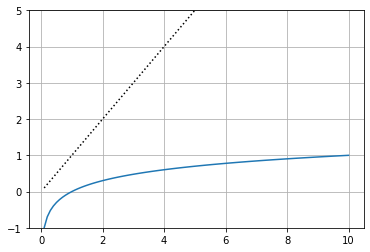

In [4]:
x=np.linspace(0.1,10,100)
xp=np.log10(x)
plt.plot(x,xp)
plt.plot(x,x,':k')
plt.ylim([-1,5])
plt.grid()

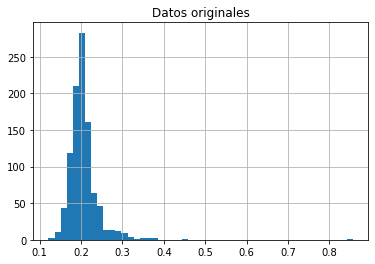

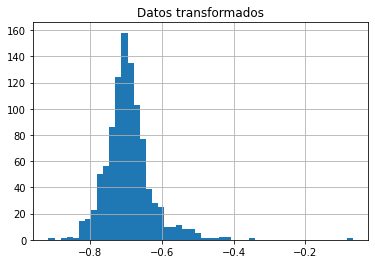

In [5]:
x=data['0']
xp=np.log10(x)

plt.hist(x,bins=50)
plt.title('Datos originales')
plt.grid()

plt.figure()
plt.hist(xp,bins=50)
plt.title('Datos transformados')
plt.grid()

In [6]:
x.skew(),xp.skew()

(6.000314443254863, 1.6236070207642421)

# Función recíporoca
$$
x'=1/x,
$$
para $x>0$ (compensando sesgo positivo).

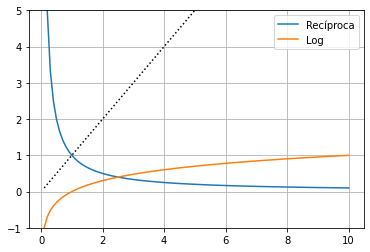

In [7]:
x=np.linspace(0.1,10,100)
xp=np.reciprocal(x)

plt.plot(x,xp,label='Recíproca')
plt.plot(x,np.log10(x),label='Log')
plt.plot(x,x,':k')
plt.legend(loc='best')
plt.ylim([-1,5])
plt.grid()

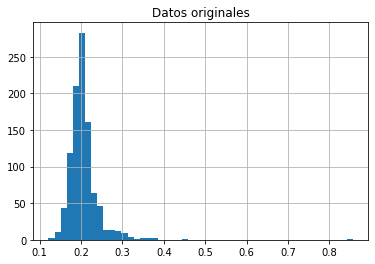

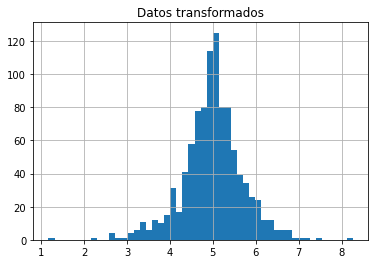

In [8]:
# Transformación con los datos sin desplazar
x=data['0']
xp=1/x

plt.hist(x,bins=50)
plt.title('Datos originales')
plt.grid()

plt.figure()
plt.hist(xp,bins=50)
plt.title('Datos transformados')
plt.grid()

In [9]:
x.skew(),xp.skew()

(6.000314443254863, -0.27061646009317947)

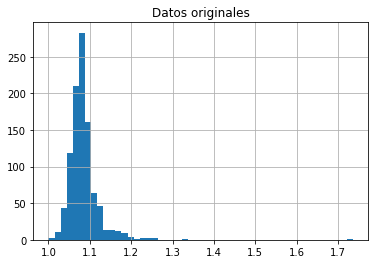

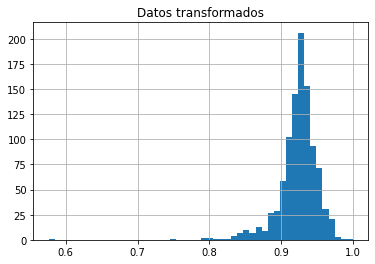

In [10]:
# Transformación de los datos desplazados
x=data['0']-data['0'].min()+1
xp=1/x

plt.hist(x,bins=50)
plt.title('Datos originales')
plt.grid()

plt.figure()
plt.hist(xp,bins=50)
plt.title('Datos transformados')
plt.grid()

In [11]:
x.skew(),xp.skew()

(6.00031444325485, -2.917443599736355)

# Otras funciones

Función *logit*
$$
x'=\log\left(\frac{x}{1-x}\right),
$$
para $x\in(0,1)$.

Función arco seno de la raíz
$$
x'=\sin^{-1}(\sqrt{x}),
$$
para $x\in[0,1]$.

Función raíz cuadrada
$$
x'=\sqrt{x},
$$
para $x\geq0$.

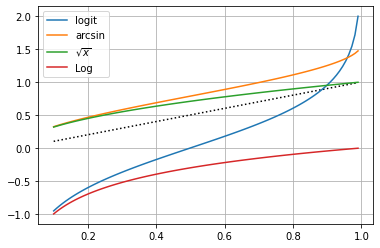

In [12]:
x=np.linspace(0.1,0.99,100)
x1=np.log10(x/(1-x))
x2=np.arcsin(np.sqrt(x))
x3=np.sqrt(x)
x4=np.log10(x)

plt.plot(x,x,':k')
plt.plot(x,x1,label='logit')
plt.plot(x,x2,label='arcsin')
plt.plot(x,x3,label='$\sqrt{x}$')
plt.plot(x,x4,label='Log')
plt.legend(loc='best')
plt.grid()

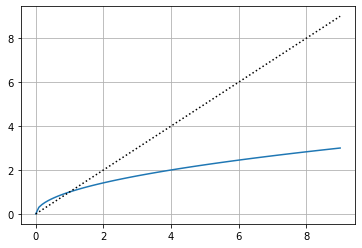

In [13]:
x=np.linspace(0,9,100)
xp=np.sqrt(x)
plt.plot(x,xp)
plt.plot(x,x,':k')
plt.grid()

In [14]:
# Logit
x=data['0']
x.min(),x.max()

(0.121028188, 0.856886278)

In [15]:
xp=np.log10(x/(1-x))
x.skew(),xp.skew()

(6.000314443254863, 4.078403247068372)

In [16]:
xp=np.arcsin(np.sqrt(x))
xp.skew()

4.982430282414601

# Regresión

In [17]:
df=pd.read_csv(ruta+'regresion.csv')
df.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


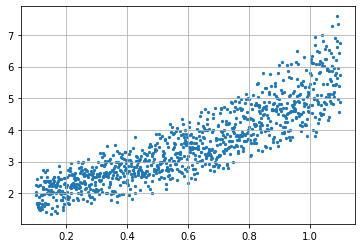

In [18]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

In [19]:
x,X,y,Y=train_test_split(df[['x']],df['y'])
linO=LinearRegression()
linT=LinearRegression()

In [20]:
linO.fit(x,y)
linO.score(x,y),linO.score(X,Y)

(0.7726182533837087, 0.8205621170030855)

In [21]:
# Transformación logarítmica
#
yp=np.log10(y)
Yp=np.log10(Y)
linT.fit(x,yp)
linT.score(x,yp),linT.score(X,Yp)

(0.7962375578781857, 0.8401951375775478)

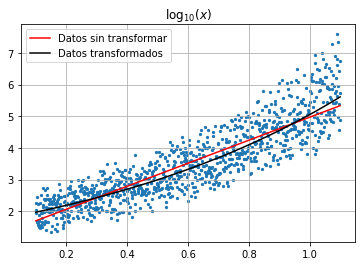

In [23]:
plt.scatter(df['x'],df['y'],s=5)
plt.plot(df['x'],linO.predict(df[['x']]),'r',label='Datos sin transformar')
plt.plot(df['x'],10**(linT.predict(df[['x']])),'k',label='Datos transformados')
plt.legend(loc='best')
plt.title('$\log_{10}(x)$')
plt.grid()

In [24]:
y.skew(),yp.skew()

(0.6550347651931842, 0.008591952939033913)

In [27]:
# Transformación sqrt
#
yp=np.sqrt(y)
Yp=np.sqrt(Y)
linT.fit(x,yp)
linT.score(x,yp),linT.score(X,Yp)

(0.7927452611311306, 0.8418901847355296)

In [28]:
yp.skew()

0.33730547196691113

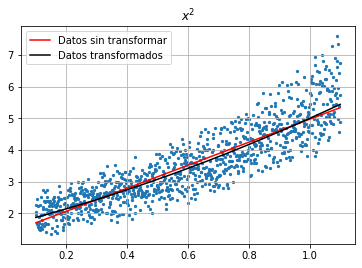

In [29]:
plt.scatter(df['x'],df['y'],s=5)
plt.plot(df['x'],linO.predict(df[['x']]),'r',label='Datos sin transformar')
plt.plot(df['x'],(linT.predict(df[['x']]))**2,'k',label='Datos transformados')
plt.legend(loc='best')
plt.title('$x^2$')
plt.grid()

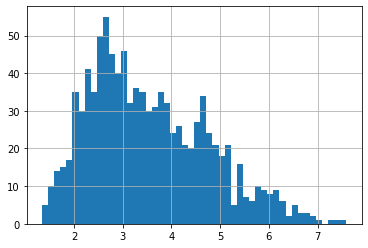

In [30]:
H=df['y'].hist(bins=50)

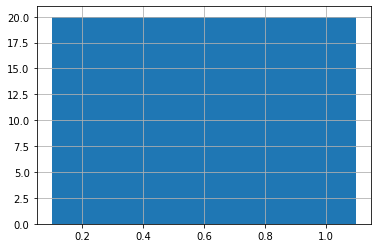

In [31]:
H=df['x'].hist(bins=50)